Heart Disease prediction system

In [ ]:
#NumPy is a powerful library for numerical operations in Python
import numpy as np


#Pandas is commonly used for data manipulation and analysis.
import pandas as pd

# for data visulaization
import seaborn as sns
import matplotlib.pyplot as plt
# Check available styles
print(plt.style.available)
# Use 'dark_background' style
plt.style.use('dark_background')


#the train_test_split function from the sklearn.model_selection module. train_test_split is a
#function commonly used in machine learning to split a dataset into training and testing sets.
from sklearn.model_selection import train_test_split


#LogisticRegression class from the sklearn.linear_model module.
#Logistic regression is a commonly used algorithm for binary classification problems in machine learning.
from sklearn.linear_model import LogisticRegression


# to check accuracy_score
from sklearn.metrics import accuracy_score

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Data Collection and Processing

In [ ]:
# loading the csv data to a pandas dataframe
heart_data = pd.read_csv('/content/heart.csv')

In [ ]:
# print first 5 row of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# print last 5 row of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
# Now check the number of column and row of the dataset
heart_data.shape

(1025, 14)

In [ ]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# checking for missing value
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# Statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Checking the distribution of target variable
heart_data["target"].value_counts()

# in the result the 1 represent that a person have heart disease and 0 respresent that the person are healthy

,count
target,
1,526
0,499


Exploratory Data Analysis (EDA)

In [ ]:
heart_data['target'].values

array([0, 0, 0, ..., 0, 1, 0])

/tmp/ipython-input-712882526.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data = heart_data, palette='pastel')


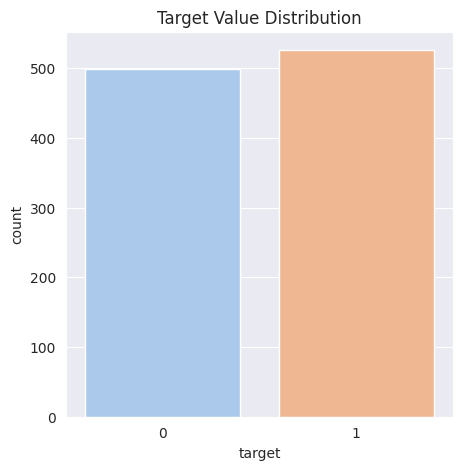

target
1    526
0    499
Name: count, dtype: int64


In [ ]:
# Checking the distribution of Target Variable

sns.set_style("darkgrid")

plt.figure(figsize=(5,5))
sns.countplot(x='target', data = heart_data, palette='pastel')
plt.title('Target Value Distribution')
plt.show()

target_temp = heart_data['target'].value_counts()
print(target_temp)

In [ ]:
print(f"Percentage of patience without heart problems: {str(round(target_temp[0]*100/1025, 2))}")
print(f"Percentage of patience with heart problems: {str(round(target_temp[1]*100/1025, 2))}")

Percentage of patience without heart problems: 48.68
Percentage of patience with heart problems: 51.32


Analysing the "Sex" Feature

In [ ]:
heart_data['sex'].unique()

array([1, 0])

/tmp/ipython-input-25946285.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='target', data=heart_data, palette='pastel')


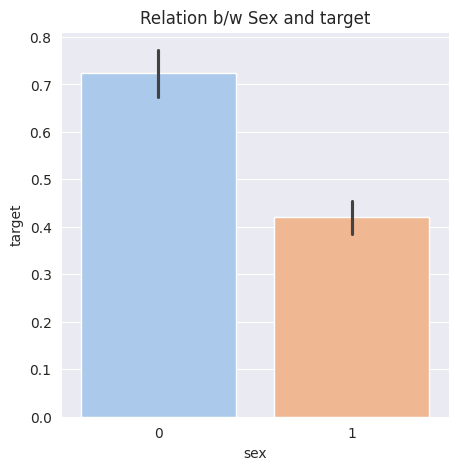

In [ ]:
sns.set_style("darkgrid")

plt.figure(figsize=(5,5))
sns.barplot(x='sex', y='target', data=heart_data, palette='pastel')
plt.title('Relation b/w Sex and target')
plt.show()

Analysing the 'Chest Pain Type (cp)' feature

In [ ]:
heart_data['cp'].unique()

array([0, 1, 2, 3])

/tmp/ipython-input-791667485.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cp', y='target', data = heart_data, palette='pastel')


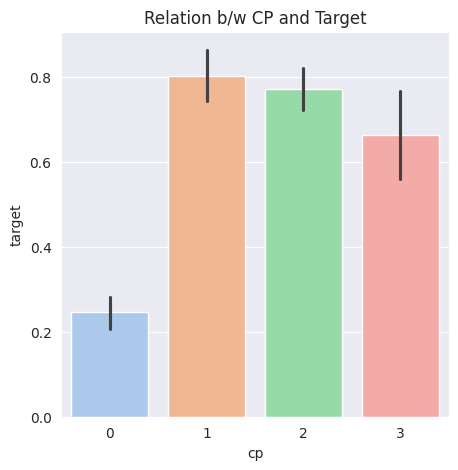

In [ ]:
sns.set_style('darkgrid')

plt.figure(figsize=(5,5))
sns.barplot(x='cp', y='target', data = heart_data, palette='pastel')
plt.title('Relation b/w CP and Target')
plt.show()

Analysing the Fasting Blood Sugar (FBS) feature

In [ ]:
heart_data['fbs'].unique()

array([0, 1])

In [ ]:
heart_data['fbs'].describe()

,fbs
count,1025.000000
mean,0.149268
std,0.356527
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


/tmp/ipython-input-1349425754.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fbs', y='target', data=heart_data, palette='pastel')


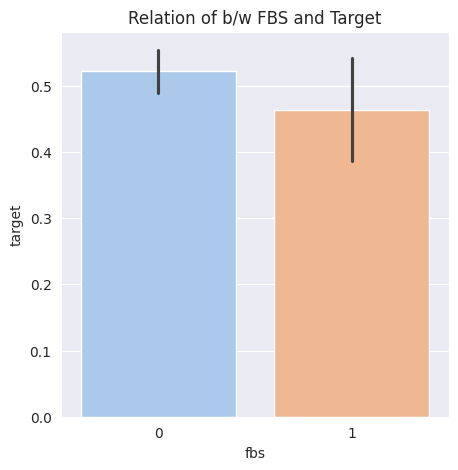

In [ ]:
#Fasting Blood Sugar > 120 mg/dl = 1
#Fasting Blood Sugar < 120 mg/dl = 0

sns.set_style('darkgrid')

plt.figure(figsize=(5,5))
sns.barplot(x='fbs', y='target', data=heart_data, palette='pastel')
plt.title('Relation of b/w FBS and Target')
plt.show()

Analysing the Resting ECG feature

In [ ]:
heart_data['restecg'].unique()

array([1, 0, 2])

/tmp/ipython-input-3376771189.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='restecg', y='target', data=heart_data, palette='pastel')


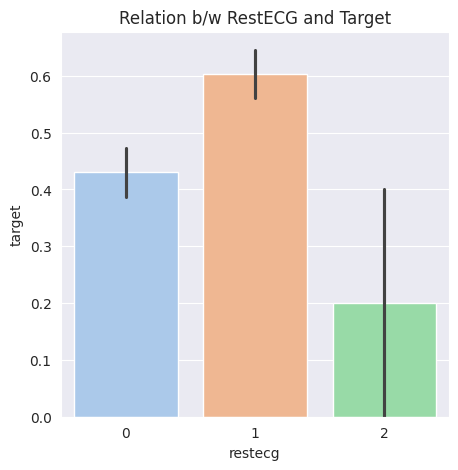

In [ ]:
sns.set_style('darkgrid')

plt.figure(figsize=(5,5))
sns.barplot(x='restecg', y='target', data=heart_data, palette='pastel')
plt.title('Relation b/w RestECG and Target')
plt.show()

Analysing the 'exang' feature

In [ ]:
heart_data['exang'].unique()

array([0, 1])

/tmp/ipython-input-2745798366.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='exang', y='target', data=heart_data, palette='pastel')


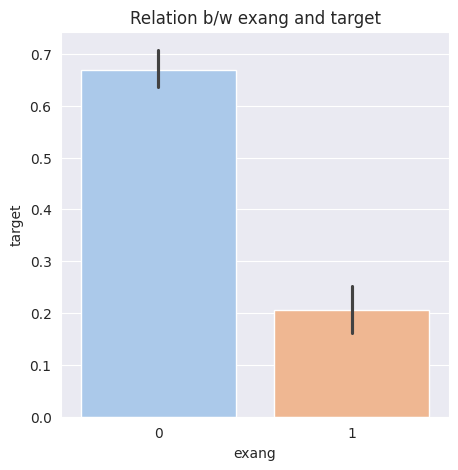

In [ ]:
sns.set_style('darkgrid')

plt.figure(figsize=(5,5))
sns.barplot(x='exang', y='target', data=heart_data, palette='pastel')
plt.title('Relation b/w exang and target')
plt.show()

Analysing the Slope Feature

In [ ]:
heart_data['slope'].unique()

array([2, 0, 1])

/tmp/ipython-input-390835341.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='slope', y='target', data=heart_data, palette='pastel')


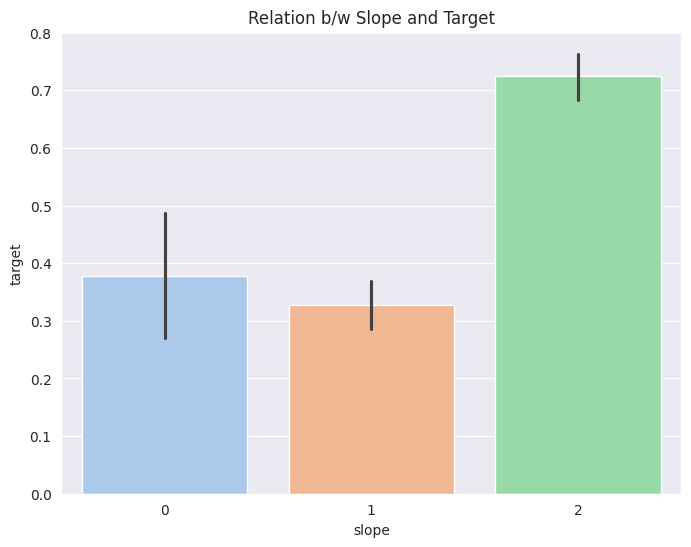

In [ ]:
sns.set_style('darkgrid')

plt.figure(figsize=(8,6))
sns.barplot(x='slope', y='target', data=heart_data, palette='pastel')
plt.title('Relation b/w Slope and Target')
plt.show()

Analysing the 'CA' Feature

In [ ]:
heart_data['ca'].unique()

array([2, 0, 1, 3, 4])

/tmp/ipython-input-1175090782.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ca', data=heart_data, palette='pastel')


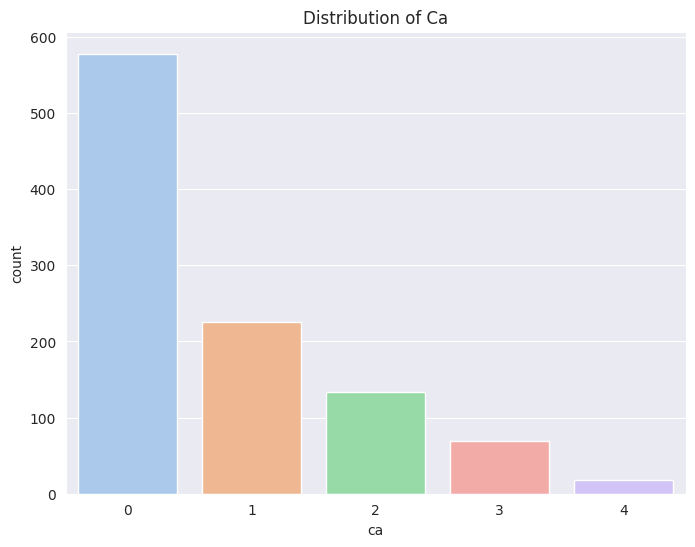

In [ ]:
sns.set_style('darkgrid')

plt.figure(figsize=(8,6))
sns.countplot(x='ca', data=heart_data, palette='pastel')
plt.title('Distribution of Ca')
plt.show()

/tmp/ipython-input-2363016883.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ca', y='target', data=heart_data, palette='pastel')


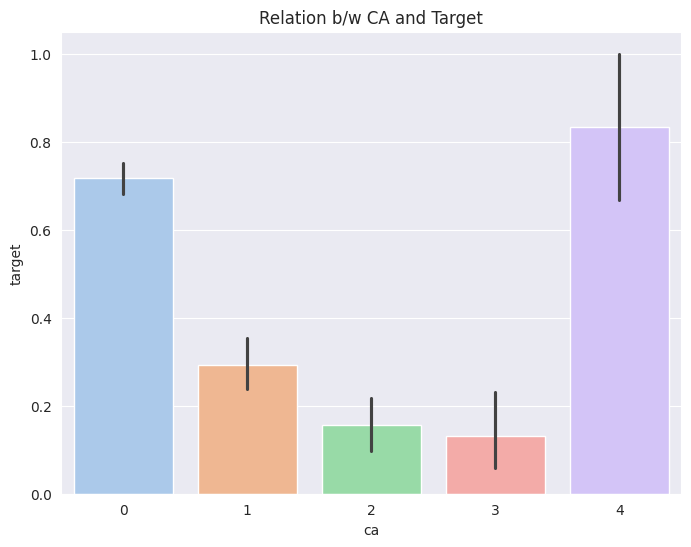

In [ ]:
sns.set_style('darkgrid')

plt.figure(figsize=(8,6))
sns.barplot(x='ca', y='target', data=heart_data, palette='pastel')
plt.title('Relation b/w CA and Target')
plt.show()

Analysing the 'thal' Feature

In [ ]:
heart_data['thal'].unique()

array([3, 2, 1, 0])

/tmp/ipython-input-3910243313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='thal', y='target', data=heart_data, palette='pastel')


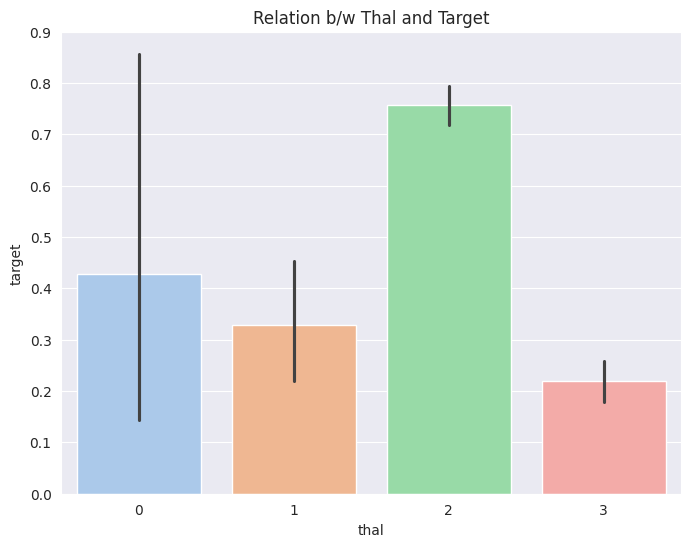

In [ ]:
sns.set_style('darkgrid')

plt.figure(figsize=(8,6))
sns.barplot(x='thal', y='target', data=heart_data, palette='pastel')
plt.title('Relation b/w Thal and Target')
plt.show()

Spliting the Features and Target

In [ ]:
# Checking the distribution of target variable
heart_data["target"].value_counts()

# in the result the 1 represent that a person have heart disease and 0 respresent that the person are healthy

,count
target,
1,526
0,499


In [ ]:
x = heart_data.drop(columns = 'target', axis = 1)
y = heart_data['target']

In [ ]:
# Now display the heart data without target
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [ ]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
1020,1
1021,0
1022,0
1023,1


Now Splitting the Data into Training data and testing data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, stratify = y, random_state = 101)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(1025, 13) (820, 13) (205, 13)


Model Training

In [ ]:
model = LogisticRegression()

In [ ]:
# Training the logisticRegression  model with Training data
model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Check accuracy score

In [ ]:
# accuracy on taining data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [ ]:
# print accuracy on training data
print('Accuracy on Training data: ',training_data_accuracy)

Accuracy on Training data:  0.8451219512195122


In [ ]:
# accuracy on test data
x_test_prediction = model.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [ ]:
# print accuracy on testing data
print('Accuracy on Testing data: ',testing_data_accuracy)

Accuracy on Testing data:  0.8682926829268293


Building a predictive system

In [ ]:
input_data = (53,0,3,120,204,0,1,173,0,3.5,0,0,1)

# change the input data to numpy array bcoz we need to reshape it and it easy to reshape numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

# Save the trained model to a file
with open('heart_disease_prediction_model.pkl', 'wb') as file:
    pickle.dump(model, file)